# Capstone Project 1 EDA 
## 2016-2017 NBA Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# import csv files
pbsdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/player_box_score_cleaned.csv')

In [3]:
tbsdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/team_box_score_cleaned.csv')

In [4]:
pbpdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/play_by_play_cleaned.csv')

Explanation here

In [33]:
tbsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 0 to 2459
Data columns (total 39 columns):
DATE                 2460 non-null object
TEAMS                2460 non-null object
VENUE                2460 non-null object
1Q                   2460 non-null int64
2Q                   2460 non-null int64
3Q                   2460 non-null int64
4Q                   2460 non-null int64
OT1                  140 non-null float64
OT2                  16 non-null float64
OT3                  2 non-null float64
OT4                  2 non-null float64
F                    2460 non-null int64
MIN                  2460 non-null int64
FG                   2460 non-null int64
FGA                  2460 non-null int64
3P                   2460 non-null int64
3PA                  2460 non-null int64
FT                   2460 non-null int64
FTA                  2460 non-null int64
OR                   2460 non-null int64
DR                   2460 non-null int64
TOT                  2460 non-

In [26]:
# create a new df for plotting that includes the NBA teams and their average assists/game
team_assist_df = tbsdf[['TEAMS', 'A']]
tadf = pd.pivot_table(team_assist_df, index=['TEAMS'], aggfunc=np.mean)
tadf.reset_index().head()

,TEAMS,A
0,Atlanta,23.634146
1,Boston,25.231707
2,Brooklyn,21.414634
3,Charlotte,23.060976
4,Chicago,22.573171


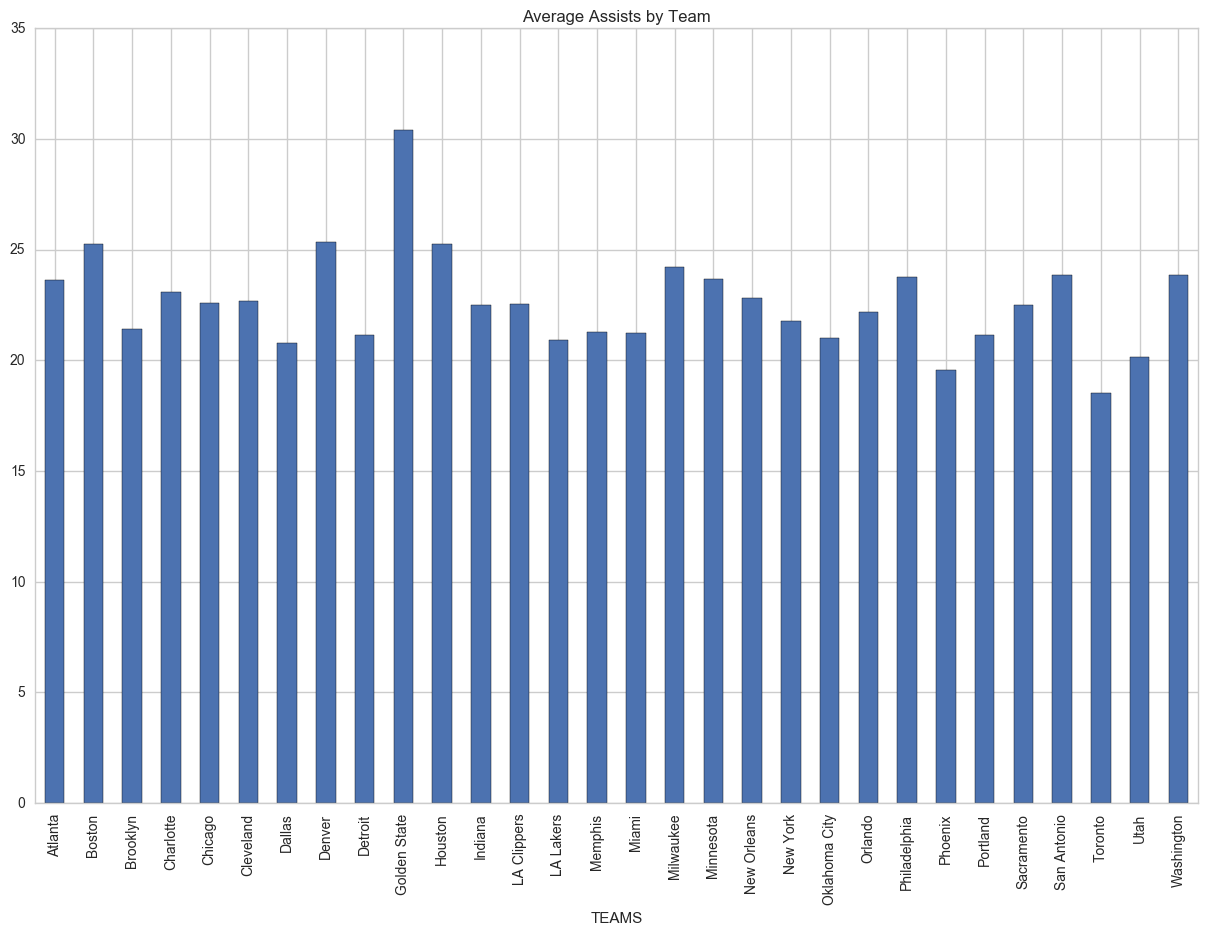

In [31]:
ax = tadf.plot(kind='bar', 
               title='Average Assists by Team', 
               figsize=(15,10), 
               legend=False)

In [73]:
# create a new df that includes the average possessions gained by steals and rebounds
team_reb_df = tbsdf[['TEAMS', 'OR', 'DR', 'ST']]
team_reb_df = team_reb_df.assign(poss_gain = team_reb_df.OR + team_reb_df.DR + team_reb_df.ST)
team_poss_df = pd.pivot_table(team_reb_df, index=['TEAMS'], aggfunc=np.mean)
team_poss_df = team_poss_df['poss_gain']

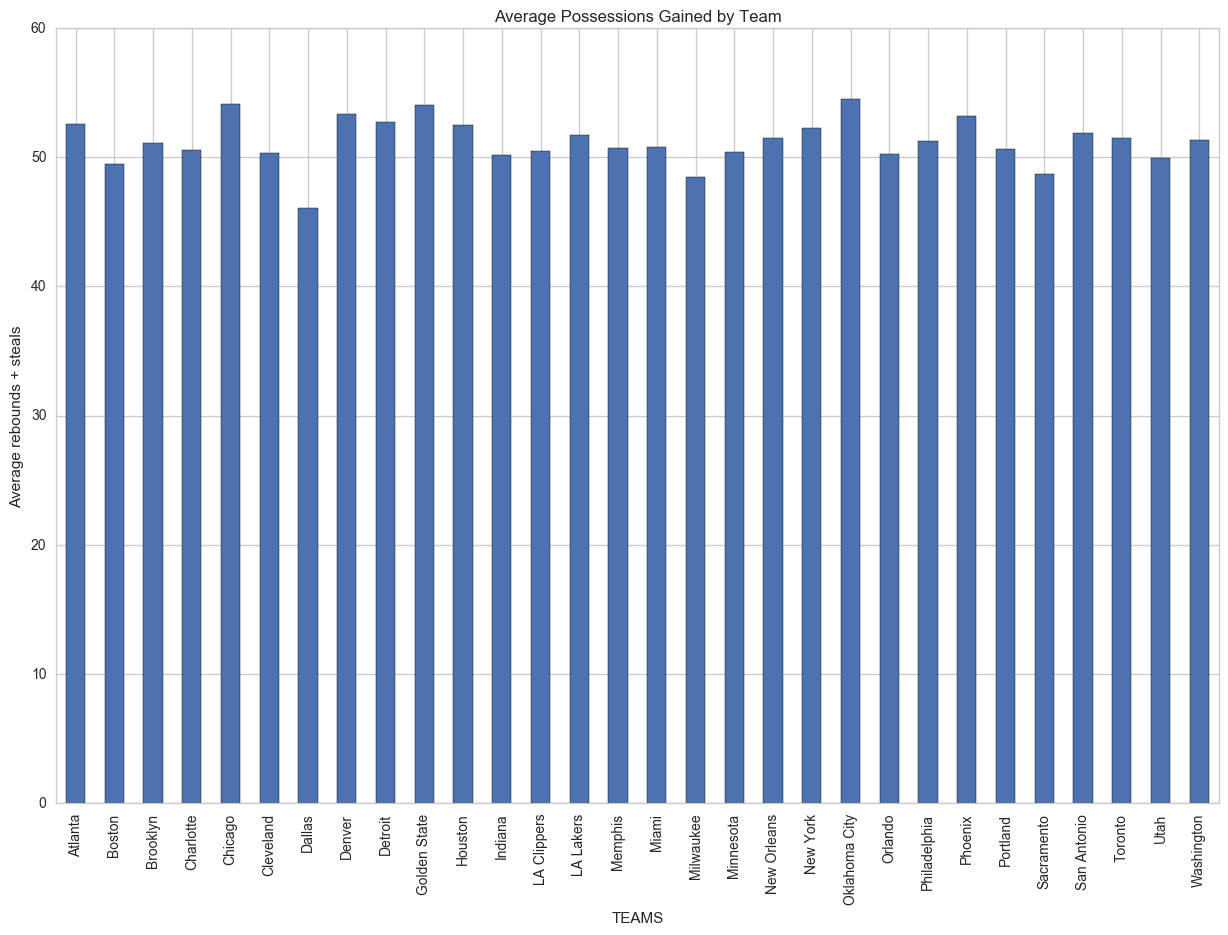

In [77]:
ax = team_poss_df.plot(kind='bar',
                  title='Average Possessions Gained by Team',
                  figsize=(15,10),
                  legend=False)
ax.set_ylabel('Average rebounds + steals')

In [79]:
pbpdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603493 entries, 0 to 603492
Data columns (total 43 columns):
game_id               603493 non-null int64
date                  603493 non-null object
a1                    603493 non-null object
a2                    603493 non-null object
a3                    603493 non-null object
a4                    603493 non-null object
a5                    603493 non-null object
h1                    603493 non-null object
h2                    603493 non-null object
h3                    603493 non-null object
h4                    603493 non-null object
h5                    603493 non-null object
period                603493 non-null int64
away_score            603493 non-null int64
home_score            603493 non-null int64
play_id               603493 non-null int64
team_in_possession    548521 non-null object
event_type            603493 non-null object
assist                60131 non-null object
away                  2240 non-null obje

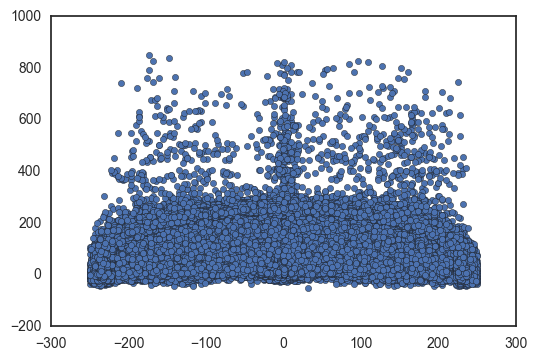

In [80]:
sns.set_style('white')
sns.set_color_codes()
plt.scatter(pbpdf.original_x, pbpdf.original_y)
plt.show()


In [11]:


from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax



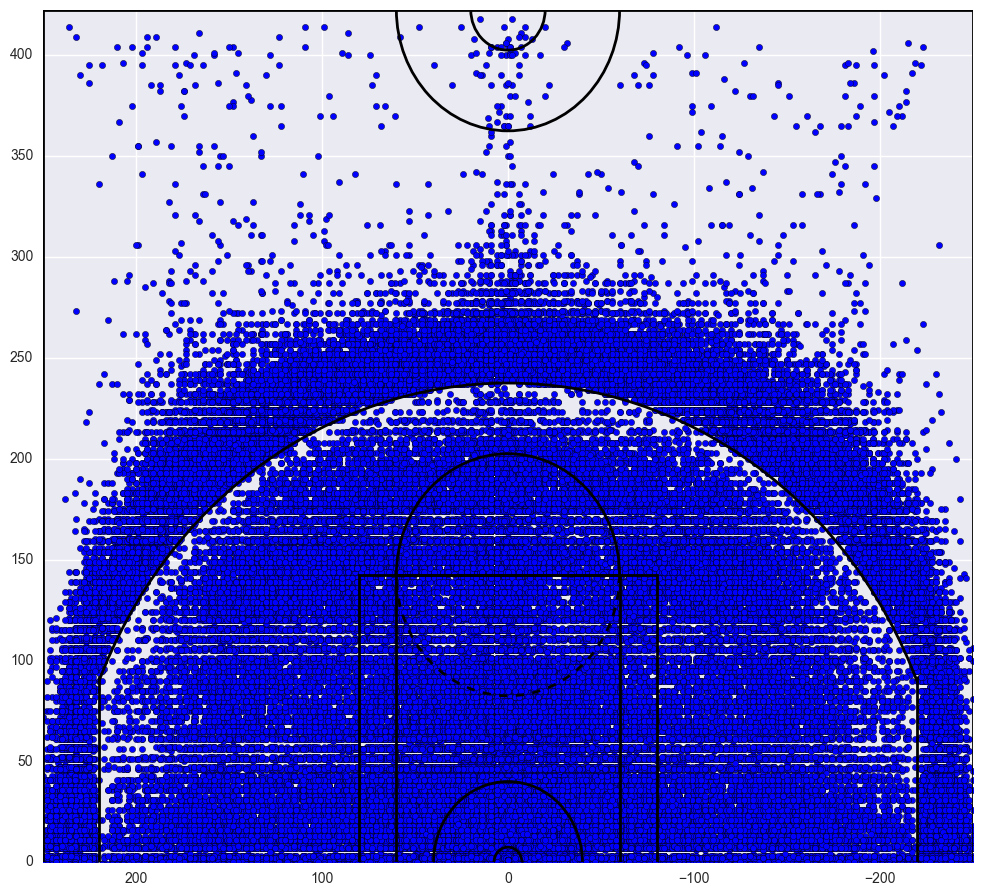

In [6]:
plt.figure(figsize=(12,11))
plt.scatter(pbpdf.original_x, pbpdf.original_y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(250,-250)
plt.ylim(0,422.5)
plt.show()

C:\Users\Mike\Anaconda2\envs\py35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


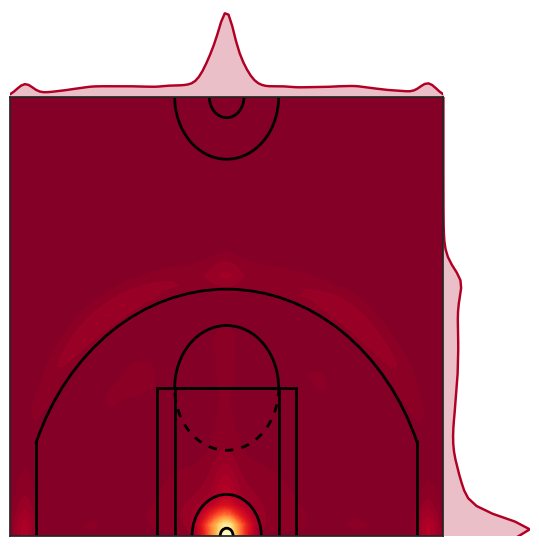

In [93]:
cmap = plt.cm.YlOrRd_r

joint_shot_chart = sns.jointplot(pbpdf.original_x, 
                                 pbpdf.original_y,
                                stat_func=None,
                                kind='kde',
                                space=0,
                                color=cmap(0.1),
                                cmap=cmap,
                                n_levels=50)
ax = joint_shot_chart.ax_joint
draw_court(ax)
ax.set_xlim(250,-250)
ax.set_ylim(0, 422.5)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
plt.show()

In [6]:
cmap = plt.cm.YlOrRd_r
shot_df = pbpdf[['team_in_possession','original_x', 'original_y', 'result']]
shot_df



'''

joint_shot_chart = sns.jointplot(pbpdf.original_x, 
                                 pbpdf.original_y,
                                stat_func=None,
                                kind='kde',
                                space=0,
                                color=cmap(0.1),
                                cmap=cmap,
                                n_levels=50)
ax = joint_shot_chart.ax_joint
draw_court(ax)
ax.set_xlim(250,-250)
ax.set_ylim(0, 422.5)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
plt.show()
'''

"\n\njoint_shot_chart = sns.jointplot(pbpdf.original_x, \n                                 pbpdf.original_y,\n                                stat_func=None,\n                                kind='kde',\n                                space=0,\n                                color=cmap(0.1),\n                                cmap=cmap,\n                                n_levels=50)\nax = joint_shot_chart.ax_joint\ndraw_court(ax)\nax.set_xlim(250,-250)\nax.set_ylim(0, 422.5)\nax.set_xlabel('')\nax.set_ylabel('')\nax.tick_params(labelbottom='off', labelleft='off')\nplt.show()\n"

In [7]:
shot_df.head()

,team_in_possession,original_x,original_y,result
0,NaN,NaN,NaN,NaN
1,NYK,NaN,NaN,NaN
2,NYK,4.0,8.0,made
3,CLE,-11.0,36.0,missed
4,NYK,NaN,NaN,NaN


In [8]:
shot_df = shot_df.dropna()

shot_df = shot_df[(shot_df.result == 'made') & (shot_df.team_in_possession == 'SAC')]

shot_df = shot_df.drop('result', axis=1)
shot_df = shot_df.drop('team_in_possession', axis=1)
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3099 entries, 5323 to 566419
Data columns (total 2 columns):
original_x    3099 non-null float64
original_y    3099 non-null float64
dtypes: float64(2)
memory usage: 72.6 KB


In [9]:
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3099 entries, 5323 to 566419
Data columns (total 2 columns):
original_x    3099 non-null float64
original_y    3099 non-null float64
dtypes: float64(2)
memory usage: 72.6 KB


In [ ]:
cmap = plt.cm.YlOrRd_r
made_shots_hm = sns.heatmap(shot_df, fmt='g', cmap='viridis' )


In [ ]:
shot_chart = sns.heatmap(made_shots_hm,
                                stat_func=None,
                                kind='kde',
                                space=0,
                                color=cmap(0.1),
                                cmap=cmap,
                                n_levels=50)
ax = joint_shot_chart.ax_joint
draw_court(ax)
ax.set_xlim(250,-250)
ax.set_ylim(0, 422.5)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
plt.show()

C:\Users\Mike\Anaconda2\envs\py35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


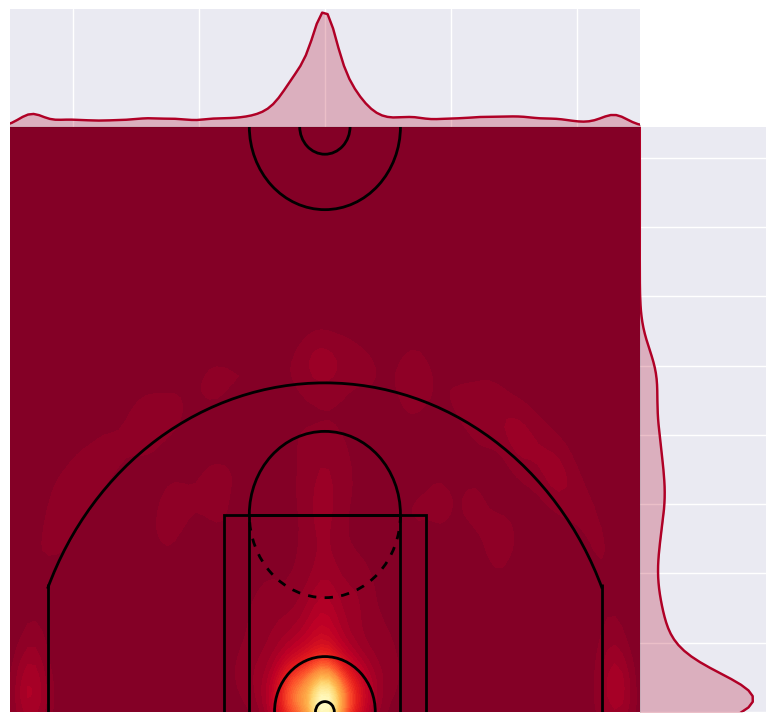

In [17]:
cmap = plt.cm.YlOrRd_r
joint_shot_chart = sns.jointplot(shot_df.original_x, 
                                 shot_df.original_y,
                                stat_func=None,
                                kind='kde',
                                space=0,
                                color=cmap(0.1),
                                cmap=cmap,
                                n_levels=50)
joint_shot_chart.fig.set_size_inches(8.72,8)
ax = joint_shot_chart.ax_joint
#dims = (11.7, 8.27)
#fig = plt.subplots(figsize=dims)
draw_court(ax)
ax.set_xlim(250,-250)
ax.set_ylim(0, 422.5)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
#plt.figure(figsize=(8,8))


In [34]:
plt.show()